# Basic Image Cleaning and Dilation

Here we create an example shower image, do a tail-cuts (picture/boundary) cleaning, and then dilate the resulting cleaning mask by several neighbor pixels

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import astropy.units as u

In [2]:
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.image import toymodel, tailcuts_clean, dilate

# Load the camera
geom = CameraGeometry.from_name("NectarCam")

# Create a fake camera image to display:
model = toymodel.Gaussian(
    x=0.2 * u.m,
    y=0.0 * u.m,
    width=0.05 * u.m,
    length=0.15 * u.m,
    psi='35d',
)

image, sig, bg = model.generate_image(
    geom, intensity=1500, nsb_level_pe=5
)

Apply the image cleaning:

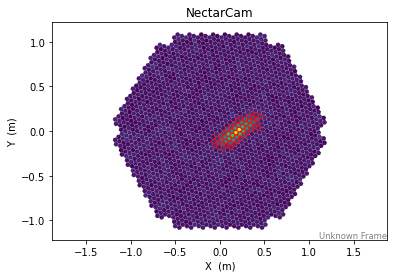

In [3]:
cleanmask = tailcuts_clean(geom, image, picture_thresh=10,
                           boundary_thresh=5)
clean = image.copy()
clean[~cleanmask] = 0.0

disp = CameraDisplay(geom, image=image)
disp.highlight_pixels(cleanmask, color='red')

Now dialte the mask a few times:

In [4]:
from ctapipe.image.cleaning import dilate

In [5]:
def show_dilate(mask, times=1):
    m = mask.copy()
    for ii in range(times):
        m = dilate(geom, m)
    CameraDisplay(geom,image=(m.astype(int)+mask.astype(int)), title='dilate{}'.format(times))

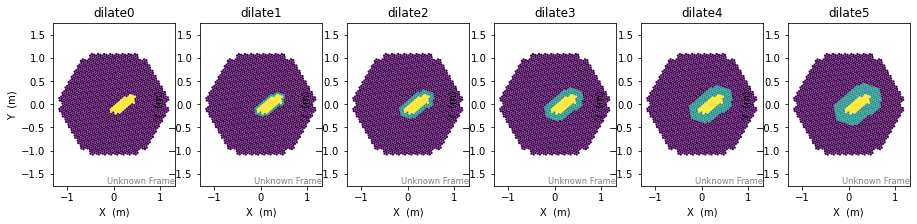

In [6]:
plt.figure(figsize=(18,3))

for ii in range(0,6):
    plt.subplot(1,7,ii+1)
    show_dilate(cleanmask.copy(), times=ii)